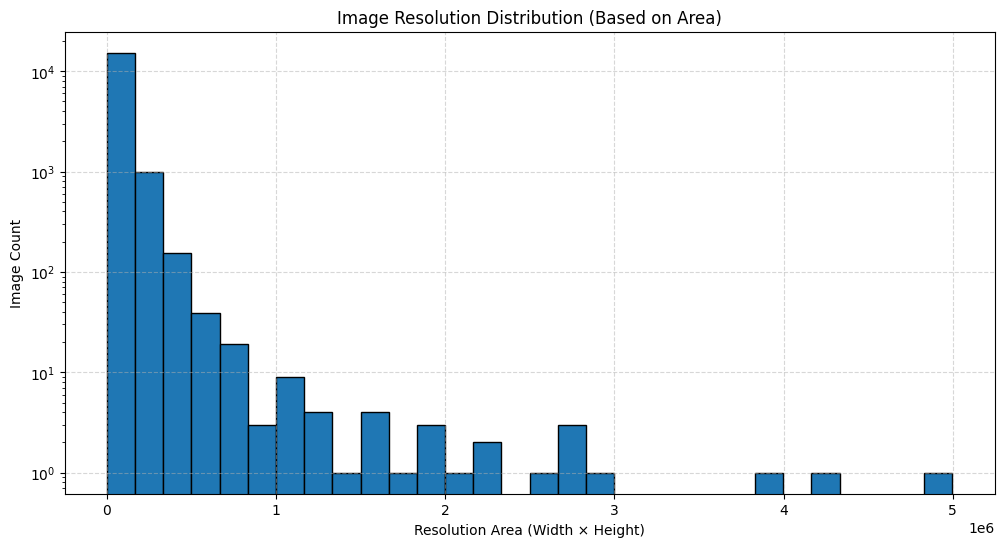

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def plot_resolution_area_histogram(directory):
    resolution_areas = []

    valid_extensions = ('.jpg', '.jpeg')

    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(valid_extensions):
                try:
                    with Image.open(os.path.join(root, filename)) as img:
                        resolution_areas.append(img.width * img.height)  # 해상도 곱 저장
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

    # 해상도 곱 기준 히스토그램 출력
    plt.figure(figsize=(12, 6))
    plt.hist(resolution_areas, bins=30, log=True, edgecolor='black')
    plt.xlabel('Resolution Area (Width × Height)')
    plt.ylabel('Image Count')
    plt.title('Image Resolution Distribution (Based on Area)')
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


example_directory_path = 'AgeDB'
plot_resolution_area_histogram(example_directory_path)


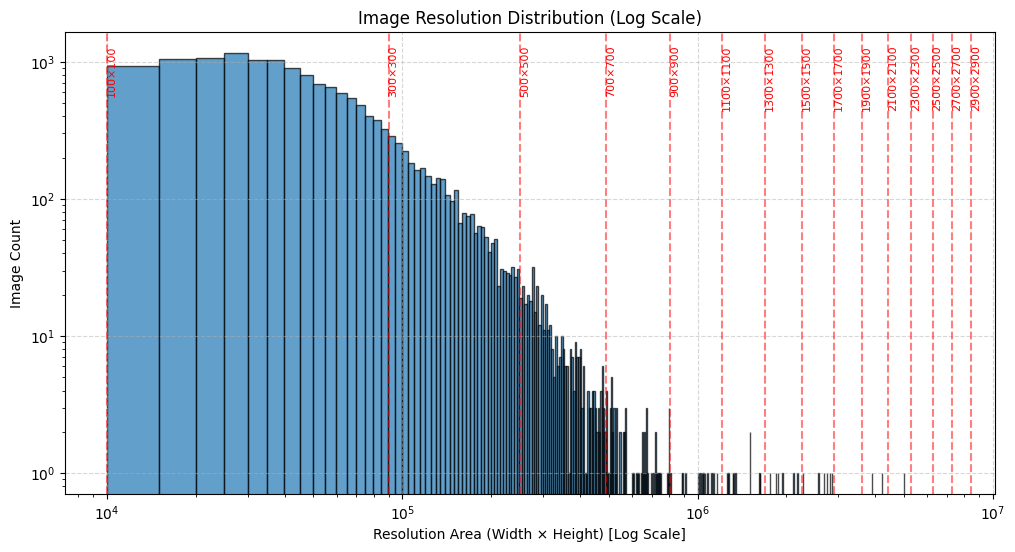

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def plot_resolution_area_histogram_logscale_with_improved_bins(directory):
    resolution_areas = []

    valid_extensions = ('.jpg', '.jpeg')

    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(valid_extensions):
                try:
                    with Image.open(os.path.join(root, filename)) as img:
                        resolution_areas.append(img.width * img.height)  # 해상도 곱 저장
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

    # X축이 너무 작은 값을 가지지 않도록 하한 설정
    resolution_areas = [area for area in resolution_areas if area >= 10_000]  # 최소 100x100 이상

    # 히스토그램 그리기 (X축 로그 스케일 적용)
    plt.figure(figsize=(12, 6))
    plt.hist(resolution_areas, bins=1000, edgecolor='black', alpha=0.7, log=True)
    plt.xscale('log')  # X축 로그 스케일 적용
    plt.xlabel('Resolution Area (Width × Height) [Log Scale]')
    plt.ylabel('Image Count')
    plt.title('Image Resolution Distribution (Log Scale)')
    plt.grid(True, linestyle="--", alpha=0.5)

    # 500 단위 주요 해상도 예시 추가 (픽셀 개수 기준)
    major_resolutions = {f"{x}×{x}": x * x for x in range(100, 3000, 200)}

    for label, pixels in major_resolutions.items():
        plt.axvline(x=pixels, color='red', linestyle='--', alpha=0.5)
        plt.text(pixels, plt.ylim()[1] * 0.8, label, rotation=90, verticalalignment='top', fontsize=8, color='red')

    plt.show()
example_directory_path = 'AgeDB'
plot_resolution_area_histogram_logscale_with_improved_bins(example_directory_path)


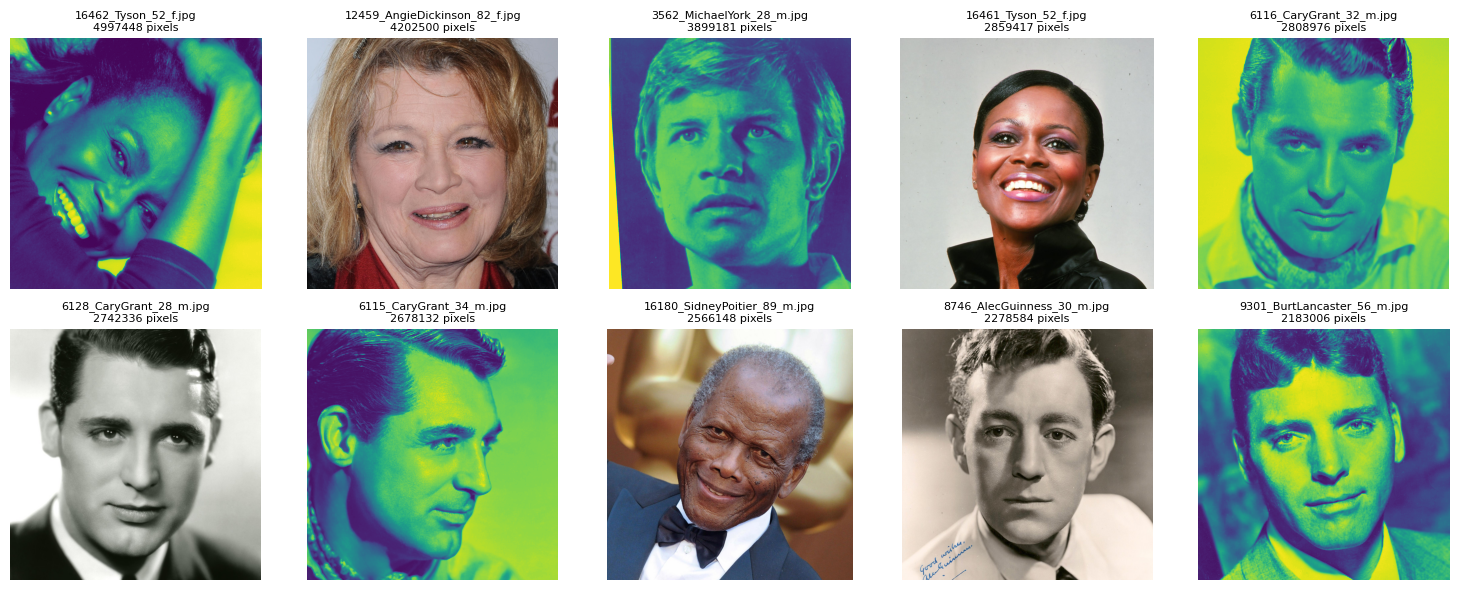

In [23]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_top10_high_resolution_images(directory):
    resolution_areas = []

    valid_extensions = ('.jpg', '.jpeg')

    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(valid_extensions):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        resolution_areas.append((filepath, img.width * img.height))  
                    print(f"Error processing {filename}: {e}")

   
    top10_images = sorted(resolution_areas, key=lambda x: x[1], reverse=True)[:10]


    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for ax, (filepath, res_area) in zip(axes.flat, top10_images):
        try:
            img = Image.open(filepath)
            ax.imshow(img)
            ax.set_title(f"{os.path.basename(filepath)}\n{res_area} pixels", fontsize=8)
            ax.axis('off')
        except Exception as e:
            ax.set_title(f"Error loading image", fontsize=8)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

example_directory_path = 'AgeDB'
plot_top10_high_resolution_images(example_directory_path)
